# 1) Using CNN on input:  Rpeak -19 / +20  ticks  (QRS only, both channels)

In [1]:
import os, sys
sys.path.append("./module")
import cnn_ecg as cnn_ecg

##### Load up Dataset #1 (Classification) and Dataset #2 (Evaluation)  and create beat segments using inputs

In [2]:
preX = 19
postX = 20
#ds1_all, ds1_ann= cnn_ecg.create_DS("1")
ds2_all, ds2_ann, ds2_seg = cnn_ecg.create_DS("2",preX,postX)
    

In [3]:
#ds1_ann["118"]['Type'].unique()
ds2_ann["111"]['Type'].unique()
ds2_ann["111"].head()
ds2_all["111"].head()
#ds2_seg["111"]

,sample,MLII,V5
0,0,-0.035,0.035
1,1,-0.035,0.035
2,2,-0.035,0.035
3,3,-0.035,0.035
4,4,-0.035,0.035


##### Create the beat segments - first with (-19 <-R_peak -> +20) interval

In [7]:
plt.figure(figsize=(24,8))

for x in range(0,7):
    dfseg1 = ds2_all["111"][(ds2_all["111"]['sample'] >= mixNList[x][0]) & (ds2_all["111"]['sample'] <= mixNList[x][1])]
    plt.title('Dataset 111 - First seven beats', color="grey")
    plt.plot(dfseg1['MLII'], color="blue")
    plt.plot(dfseg1['V5'], color="red")

NameError: name 'plt' is not defined

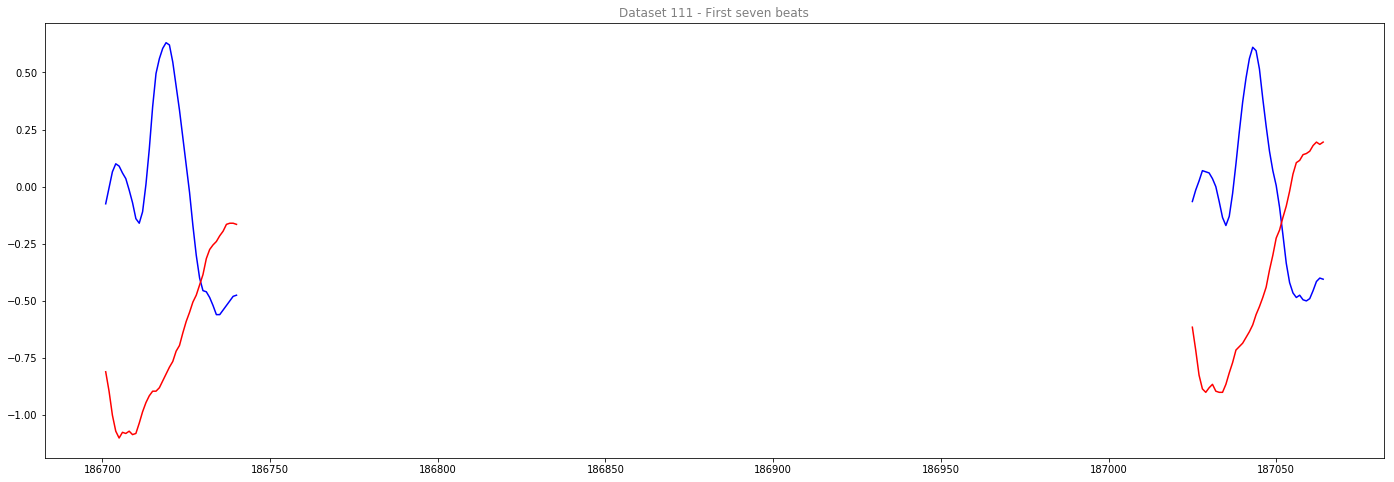

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

preX = 19;
postX = 20;
begNList = [];
endNList = [];
mixNList = [];
sliceNList = [];
    
for index, row in ds2_ann["111"].iterrows():
    Nbegin = row['sample'] - preX;
    Nend = row['sample'] + postX;
    begNList.append(Nbegin);
    endNList.append(Nend);

mixNList = tuple(zip(begNList,endNList)) 
#mixNList[-1]
        
plt.figure(figsize=(24,8))

for x in range(0,7):
    dfseg1 = ds2_all["111"][(ds2_all["111"]['sample'] >= mixNList[x][0]) & (ds2_all["111"]['sample'] <= mixNList[x][1])]
    plt.title('Dataset 111 - First seven beats', color="grey")
    plt.plot(dfseg1['MLII'], color="blue")
    plt.plot(dfseg1['V5'], color="red")

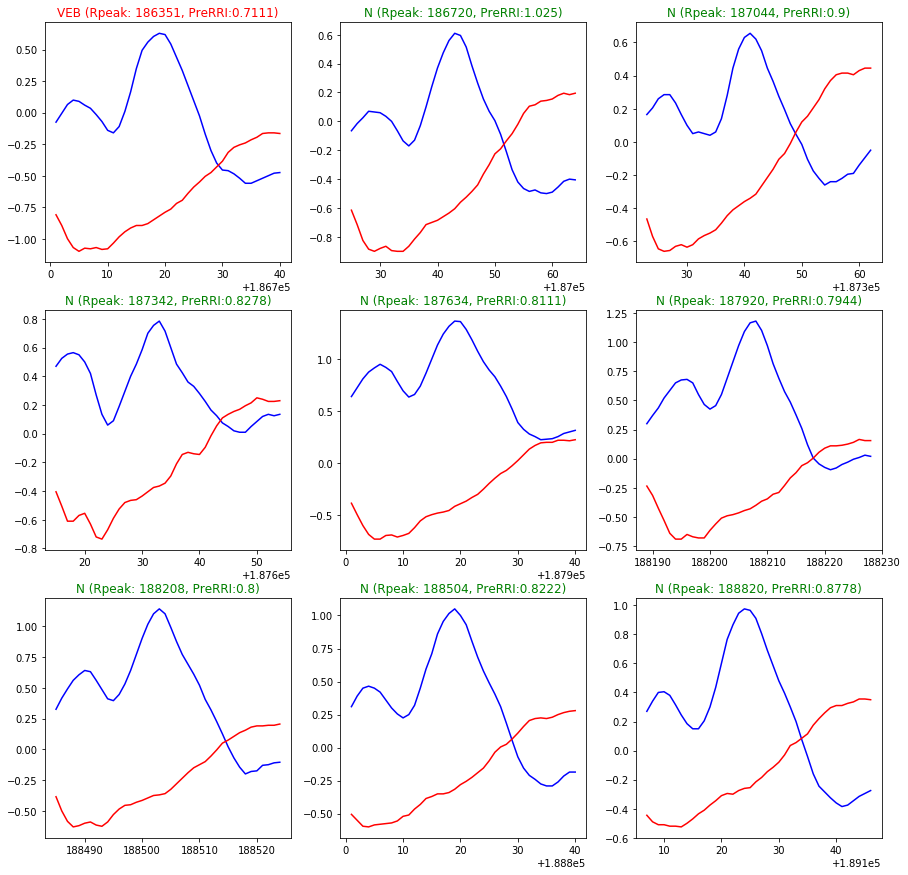

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))

i = 600 # 20 115        
y = -1
for x in range(0,9):
    if x % 3 == 0:
        y=y+1
    dfseg1 = ds2_all["111"][(ds2_all["111"]['sample'] >= mixNList[x+i][0]) & (ds2_all["111"]['sample'] <= mixNList[x+i][1])]
    
    if str(ds2_ann["111"]['Type'][x+i]) != 'N':
        axes[y, x % 3].set_title('my title', color="red")
    else:
        axes[y, x % 3].set_title('my title', color="green")
  
    axes[y, x % 3].plot(dfseg1['MLII'], color="blue")
    axes[y, x % 3].plot(dfseg1['V5'], color="red")
    axes[y, x % 3].set_title(str(ds2_ann["111"]['Type'][x+i]) + ' (Rpeak: ' + str(ds2_ann["111"]['sample'][x+i])  + ', PreRRI:' + str(float("{0:.4f}".format(ds2_ann["111"]['RRI'][x+i]))) +  ')' )
